In [1]:
# task 1
from scipy.stats import expon
from scipy.stats import norm
import math

# task 2
import matplotlib.pyplot as plt
import pandas as pd

В лабораторной используется экспоненциальное распределение, с параметром $\lambda$

In [2]:
parameter = 3
nSample = 500
epsilon = 0.01
delta = 0.05

In [3]:
expectation = 1 / parameter
dispersion = 1 / parameter ** 2

по условию нам надо найти $$P(|\bar{X} - EX| \leq \epsilon) \geq 1 - \delta$$

Подставим и преобразуем $\bar{X} = \frac{\sum_{i=1}^n{x_i}}{n} = \frac{S_n}{n}$, $EX = \frac{1}{\lambda}$, $D = DX = \frac{1}{\lambda^2}$
$$P(|\frac{\lambda S_n - n}{n \lambda}| \leq \epsilon) \geq 1 - \delta$$
$$P(\frac{1}{\sqrt{nD}} |\frac{\lambda S_n - n}{n \lambda}| \leq \frac{\epsilon}{\sqrt{nD}}) \geq 1 - \delta$$
$$P(-\frac{\epsilon}{\sqrt{nD}} \leq \frac{1}{\sqrt{nD}} \frac{\lambda S_n - n}{n \lambda} \leq \frac{\epsilon}{\sqrt{nD}}) \geq 1 - \delta$$
$$P(-\frac{\epsilon n}{\sqrt{nD}} \leq \frac{\lambda S_n - n}{\sqrt{nD} \lambda} \leq \frac{\epsilon n}{\sqrt{nD}}) \geq 1 - \delta$$

Заметим, что $\frac{\lambda S_n - n}{\lambda} = S_n - \frac{1}{\lambda}n = S_n - \mu_\theta n$ тогда наше выражение примет вид:
$$P(-\frac{\epsilon n}{\sqrt{nD}} \leq \frac{S_n - \mu_\theta n}{\sqrt{nD}} \leq \frac{\epsilon n}{\sqrt{nD}}) \geq 1 - \delta$$

По ЦПТ:
$$P(-\frac{\epsilon n}{\sqrt{nD}} \leq \frac{S_n - \mu_\theta n}{\sqrt{nD}} \leq \frac{\epsilon n}{\sqrt{nD}}) \rightarrow Ф(\frac{\epsilon n}{\sqrt{nD}}) - Ф(-\frac{\epsilon n}{\sqrt{nD}})$$

$$Ф(\frac{\epsilon n}{\sqrt{nD}}) - Ф(-\frac{\epsilon n}{\sqrt{nD}}) = Ф(\frac{\epsilon n}{\sqrt{nD}}) - (1 - Ф(\frac{\epsilon n}{\sqrt{nD}})) = 2Ф(\frac{\epsilon n}{\sqrt{nD}}) - 1$$

$$2Ф(\frac{\epsilon n}{\sqrt{nD}}) - 1 \geq 1 - \delta \rightarrow Ф(\frac{\epsilon n}{\sqrt{nD}}) \geq \frac{2 - \delta}{2}$$

Подставим $D = \frac{1}{\lambda^2}$:
$$Ф(\frac{\epsilon n}{\sqrt{n\frac{1}{\lambda^2}}}) = Ф(\frac{\epsilon|\lambda|n}{\sqrt{n}}) \stackrel{т.к.\lambda \in (1, 5)}{=} Ф(\epsilon \lambda \sqrt{n})$$

Подставим известные значения:
$$
Ф(\frac{1}{100}3\sqrt{n}) \geq \frac{2 - 0,05}{2} \rightarrow Ф(\frac{3\sqrt{n}}{100}) \geq 0.975
$$

Воспользуемся функцией scipy.stats.expon.ppf, чтобы узнать интересующий нас квантиль

In [4]:
sampleSize = math.ceil((norm.ppf(0.975) * 100 / 3) ** 2)

counter = 0
for i in range(nSample):
    sample = expon.rvs(scale = expectation, size = sampleSize)
    if abs(sample.mean() - expectation) > epsilon:
        counter += 1

In [5]:
print(f"Количество отклонений выборочного среднего от мат.ожидания более чем на {epsilon}: {counter} раз")
print(f"Вероятность такого события: {counter/nSample}")

Количество отклонений выборочного среднего от мат.ожидания более чем на 0.01: 18 раз
Вероятность такого события: 0.036


In [6]:
class Plotter:
    def __init__(self, df: pd.DataFrame):
        self.sepal_square_data = df["Sepal.Length"] * df["Sepal.Width"]
        self.petal_square_data = df["Petal.Length"] * df["Petal.Width"]

        self.max_sepal = self.sepal_square_data.max()
        self.max_petal = self.petal_square_data.max()
        self.min_sepal = self.sepal_square_data.min()
        self.min_petal = self.petal_square_data.min()

        self.imperic_x_sepal = []
        self.imperic_y_sepal = []
        self.imperic_x_petal = []
        self.imperic_y_petal = []

    def make_imperic_function(self, step = 0.01):
        y = 0
        sum = 0
        while y < self.max_sepal:
            for x in self.sepal_square_data:
                if x < y:
                    sum += 1
            sum /= len(self.sepal_square_data)
            self.imperic_x_sepal.append(y)
            self.imperic_y_sepal.append(sum)
            y += step

        y = 0
        sum = 0
        while y < self.max_petal:
            for x in self.petal_square_data:
                if x < y:
                    sum += 1
            sum /= len(self.petal_square_data)
            self.imperic_x_petal.append(y)
            self.imperic_y_petal.append(sum)
            y += step

    def plot_imperic(self):
        self.make_imperic_function()
        plt.subplot(1, 2, 1)
        plt.plot(self.imperic_x_sepal, self.imperic_y_sepal)
        plt.xlabel("Value")
        plt.ylabel("Probability")

        plt.subplot(1, 2, 2)
        plt.plot(self.imperic_x_petal, self.imperic_y_petal)
        plt.xlabel("Value")
        plt.ylabel("Probability")
        plt.show()
        plt.close()

    def plot_histogram(self):
        plt.subplot(1, 2, 1)
        plt.hist(self.sepal_square_data, bins=30)
        plt.xlabel("Value")
        plt.ylabel("Frequency")

        plt.subplot(1, 2, 2)
        plt.hist(self.petal_square_data, bins=30)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
        plt.close()

    def plot_boxplot(self):
        plt.subplot(1, 2, 1)
        plt.boxplot(self.sepal_square_data)

        plt.subplot(1, 2, 2)
        plt.boxplot(self.petal_square_data)
        plt.show()
        plt.close()



In [7]:
def print_info(df: pd.DataFrame):
    sepal_square_data = df["Sepal.Length"] * df["Sepal.Width"]
    print(f"Средняя площадь чашелистика: {sepal_square_data.mean():.2f}")
    print(f"Дисперсия площади чашелистика: {sepal_square_data.var():.2f}")
    print(f"Медиана площади чашелистика: {sepal_square_data.median():.2f}")
    print(f"Квантиль порядка 2/5 чашелистика: {sepal_square_data.quantile(2/5):.2f}\n")

    petal_square_data = df["Petal.Length"] * df["Petal.Width"]
    print(f"Средняя площадь лепестка: {petal_square_data.mean():.2f}")
    print(f"Дисперсия площади лепестка: {petal_square_data.var():.2f}")
    print(f"Медиана площади лепестка: {petal_square_data.median():.2f}")
    print(f"Квантиль порядка 2/5 лепестка: {petal_square_data.quantile(2/5):.2f}\n")

In [8]:
file = "iris.csv"

iris_data = pd.read_csv(file)

iris_data.groupby("Species")

species_count = iris_data.value_counts("Species")
species_count.sort_values(ascending=False)

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [9]:
selections = {
    "all flowers": iris_data
}

for i in species_count.keys():
    selections[i] = iris_data[iris_data["Species"] == i]

		 all flowers
Средняя площадь чашелистика: 17.82
Дисперсия площади чашелистика: 11.30
Медиана площади чашелистика: 17.66
Квантиль порядка 2/5 чашелистика: 16.82

Средняя площадь лепестка: 5.79
Дисперсия площади лепестка: 22.21
Медиана площади лепестка: 5.62
Квантиль порядка 2/5 лепестка: 4.52



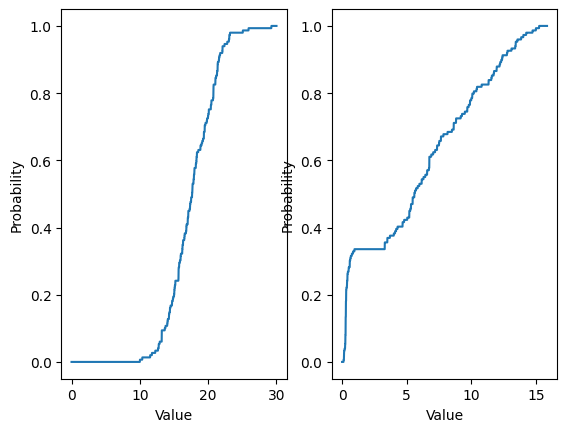

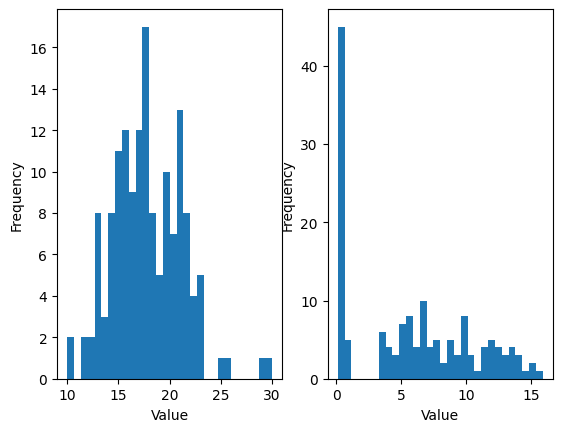

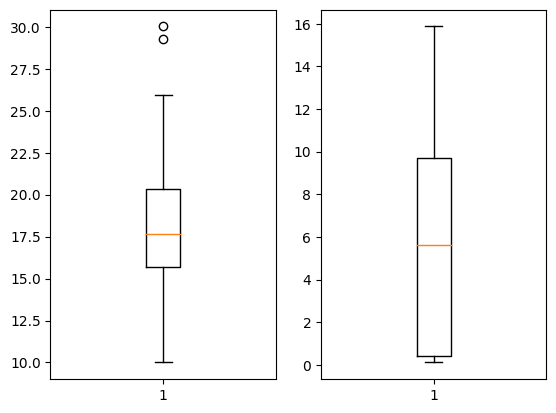

		 setosa
Средняя площадь чашелистика: 17.26
Дисперсия площади чашелистика: 8.61
Медиана площади чашелистика: 17.17
Квантиль порядка 2/5 чашелистика: 16.43

Средняя площадь лепестка: 0.37
Дисперсия площади лепестка: 0.03
Медиана площади лепестка: 0.30
Квантиль порядка 2/5 лепестка: 0.29



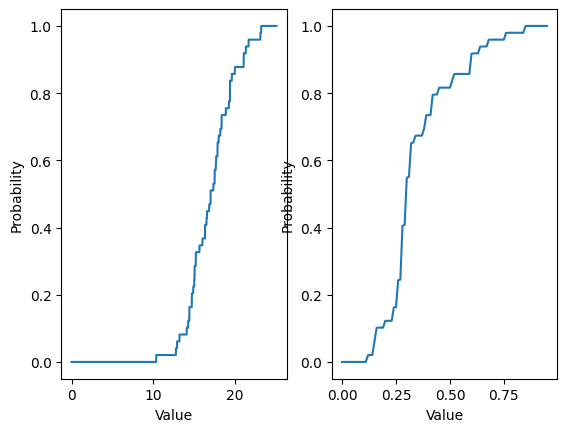

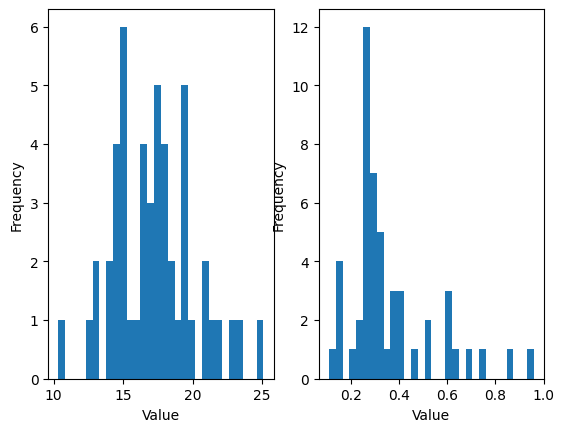

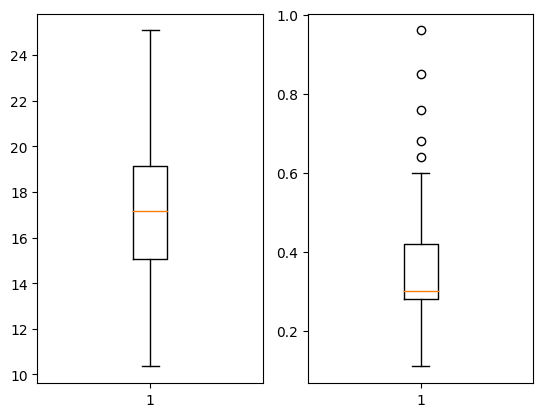

		 versicolor
Средняя площадь чашелистика: 16.53
Дисперсия площади чашелистика: 8.22
Медиана площади чашелистика: 16.38
Квантиль порядка 2/5 чашелистика: 15.88

Средняя площадь лепестка: 5.72
Дисперсия площади лепестка: 1.87
Медиана площади лепестка: 5.62
Квантиль порядка 2/5 лепестка: 5.41



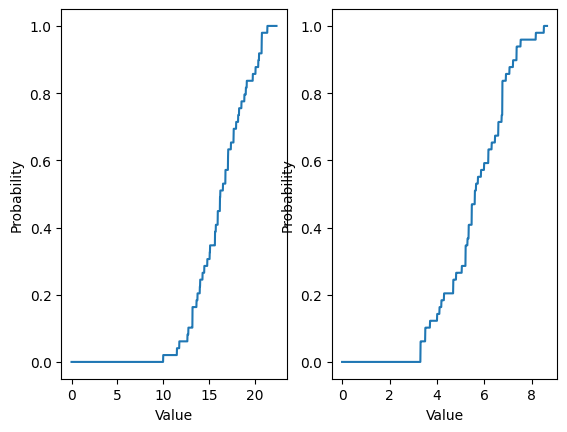

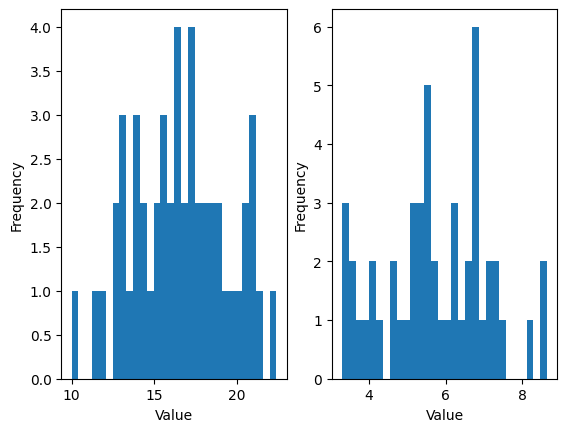

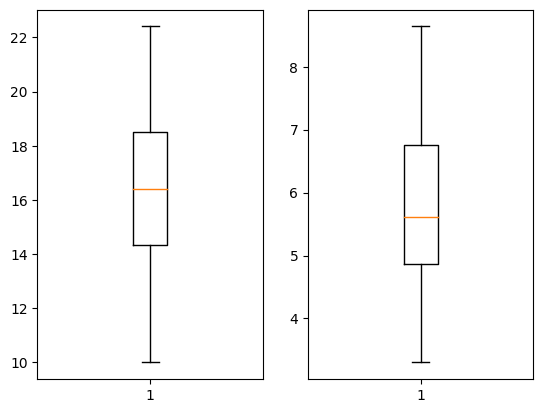

		 virginica
Средняя площадь чашелистика: 19.68
Дисперсия площади чашелистика: 11.96
Медиана площади чашелистика: 20.06
Квантиль порядка 2/5 чашелистика: 19.02

Средняя площадь лепестка: 11.30
Дисперсия площади лепестка: 4.65
Медиана площади лепестка: 11.45
Квантиль порядка 2/5 лепестка: 10.32



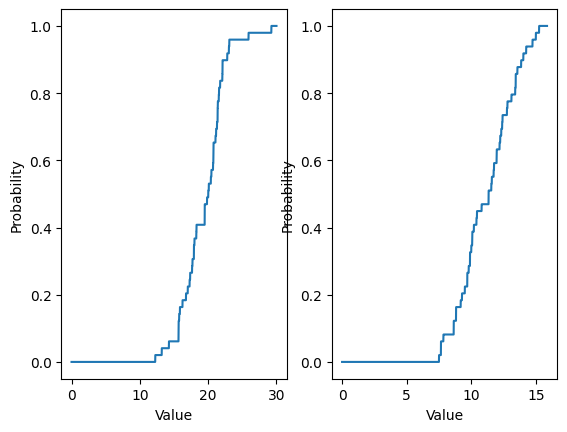

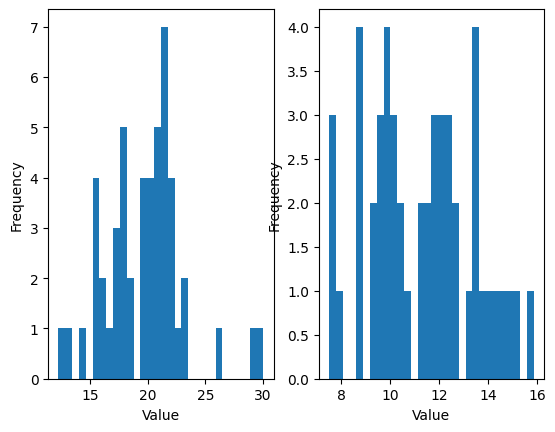

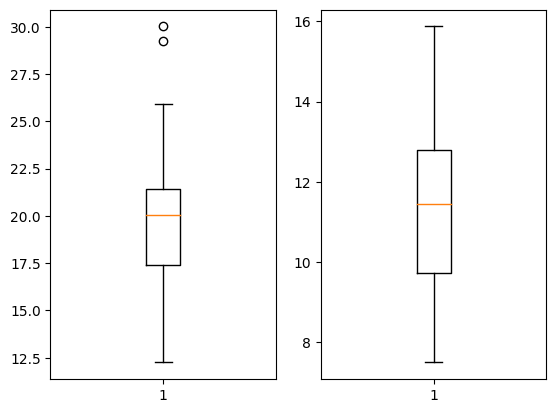

In [10]:
for i in selections:
    print(f"\t\t {i}")
    print_info(selections[i])
    plotter = Plotter(selections[i])
    plotter.plot_imperic()
    plotter.plot_histogram()
    plotter.plot_boxplot()